# Seaborn Drills

I'm using a new to me Kaggle dataset - [Chocolate Bar Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings/home).  From the Kaggle data overview, the columns are as follows:

>Company  (Maker-if known): Name of the company manufacturing the bar.

>Specific Bean Origin or Bar Name: The specific geo-region of origin for the bar.

>REF: A value linked to when the review was entered in the database. Higher = more recent.

>Review Date: Date of publication of the review.

>Cocoa Percent: Cocoa percentage (darkness) of the chocolate bar being reviewed.

>Company Location: Manufacturer base country.

>Rating: Expert rating for the bar.

>Bean Type: The variety (breed) of bean used, if provided.

>Broad Bean Origin: The broad geo-region of origin for the bean.



The rating system has been described by the Kaggle author as:

>5 = Elite (Transcending beyond the ordinary limits) 

>4 = Premium (Superior flavor development, character and style)

>3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)

>2 = Disappointing (Passable but contains at least one significant flaw)

>1 = Unpleasant (mostly unpalatable)


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

choc_rate = pd.read_csv('flavors_of_cacao.csv')
choc_rate.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [22]:
choc_rate.columns = ['company', 
                     'bean_origin', 
                     'ref', 
                     'review_date', 
                     'p_cocoa', 
                     'comp_loc', 
                     'rating', 
                     'bean_type', 
                     'broad_bean_origin'
                    ]

In [23]:
choc_rate.head()

,company,bean_origin,ref,review_date,p_cocoa,comp_loc,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [24]:
choc_rate.describe()

,ref,review_date,rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [25]:
choc_rate.dtypes

company               object
bean_origin           object
ref                    int64
review_date            int64
p_cocoa               object
comp_loc              object
rating               float64
bean_type             object
broad_bean_origin     object
dtype: object

In [26]:
choc_rate['p_cocoa'] = choc_rate['p_cocoa'].str.replace('%','').astype(float)/100

In [47]:
rev_per_yr = pd.DataFrame(choc_rate['review_date'].value_counts()
                         ).reset_index(drop=False).rename(columns = {'index':'year', 'review_date':'count'})

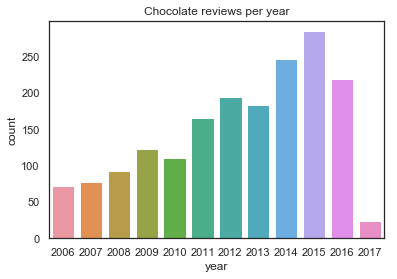

Colorful bar chart, good to see gradual increase, tough to read each value


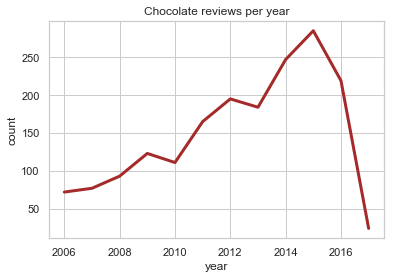

Easy to read lineplot which highlights the drastic fall off in 2017 reviews


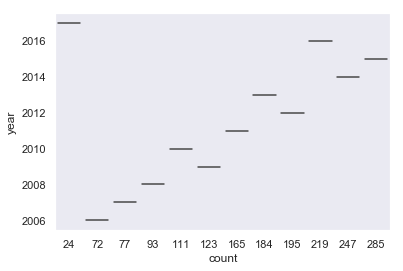

Useless violin plot


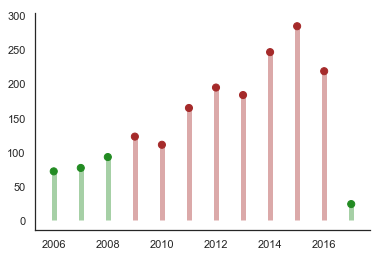

Lollipop plot which is just a variation on the bar chart, 
colored to easily vizualize years with more than 100 reviews


In [127]:
sns.barplot(x='year', y='count', data=rev_per_yr)
plt.title('Chocolate reviews per year')
plt.show()

print('Colorful bar chart, good to see gradual increase, tough to read each value')

sns.set(style='whitegrid')
sns.lineplot(x='year', y='count', data=rev_per_yr, linewidth=3, color='brown')
plt.title('Chocolate reviews per year')
plt.show()

print('Easy to read lineplot which highlights the drastic fall off in 2017 reviews')

sns.set(style='dark')
sns.violinplot(x='count', y='year', data=rev_per_yr)
plt.show()

print('Useless violin plot')

sns.set(style='white')
x = rev_per_yr['year']
y = rev_per_yr['count']
my_color=np.where(y>=100, 'brown', 'forestgreen')
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, linewidth=5, alpha=0.4)
plt.scatter(x, y, color=my_color, s=50, alpha=1)
sns.despine()
plt.show()

print('Lollipop plot which is just a variation on the bar chart, \ncolored to easily vizualize years with more than 100 reviews')



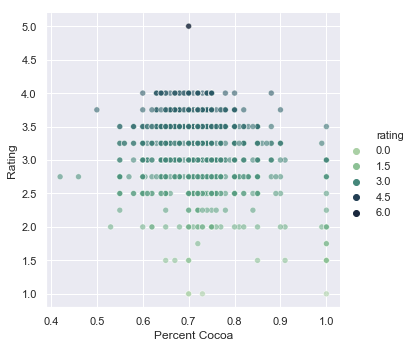

Scatter plot showing essentially randomly distributed data, colored by rating


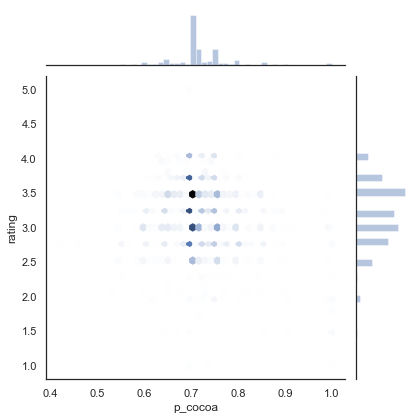

Hexbin plot showing where the highest density data lie, 
though data don't appear dense enough for this plot type


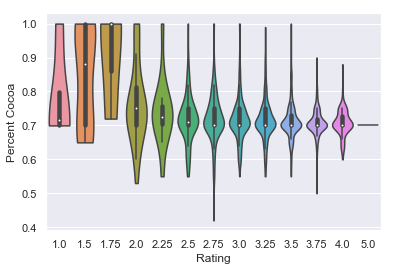

Violin plot which highlights a trend between rating and percent cocoa


In [131]:
rate_cocoa = choc_rate[['rating', 'p_cocoa']]


sns.set(style='darkgrid')
sns.relplot(x='p_cocoa', y='rating', data=rate_cocoa, hue='rating', palette='ch:r=-.5,l=.75', alpha=0.6)
plt.xlabel('Percent Cocoa')
plt.ylabel('Rating')
plt.show()

print('Scatter plot showing essentially randomly distributed data, colored by rating')

with sns.axes_style('white'):
    sns.jointplot(x='p_cocoa', y='rating', data=rate_cocoa, kind="hex", color="B")
plt.show()

print("Hexbin plot showing where the highest density data lie, \nthough data don't appear dense enough for this plot type")

sns.violinplot(x='rating', y='p_cocoa', data=rate_cocoa, scale='width', cut=0)
plt.xlabel('Rating')
plt.ylabel('Percent Cocoa')
plt.show()

print('Violin plot which highlights a trend between rating and percent cocoa')



In [221]:
rate_brbeanor = choc_rate[['review_date', 'rating', 'broad_bean_origin']].replace(r'^\s+$', np.nan, regex=True).dropna()

top_rate_brbeanor = rate_brbeanor.groupby('broad_bean_origin').filter(lambda x: len(x) >= 25).reset_index(drop=True)

topmean_rate_brbeanor = top_rate_brbeanor.groupby('broad_bean_origin')['rating'].mean()
topmean_rate_brbeanor = pd.DataFrame(topmean_rate_brbeanor
                                    ).reset_index(drop=False).sort_values('rating', ascending=False)

year_rate_brbeanor = top_rate_brbeanor.groupby(['broad_bean_origin', 'review_date']
                                              )['rating'].mean().reset_index(drop=False)



,broad_bean_origin,review_date,rating
0,Belize,2010,2.750000
1,Belize,2011,3.250000
2,Belize,2012,2.750000
3,Belize,2013,3.208333
4,Belize,2014,3.187500
5,Belize,2015,3.350000
6,Belize,2016,3.291667
7,Belize,2017,3.250000
8,Bolivia,2006,4.000000
9,Bolivia,2008,2.916667


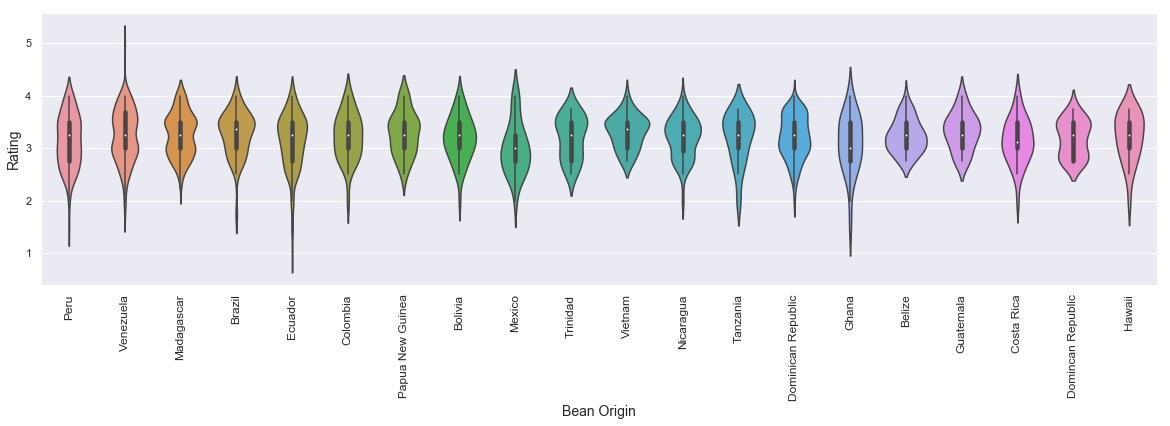

Violin plot of ratings for all bean origins with more than 25 ratings, 
not ordered in any discernable way


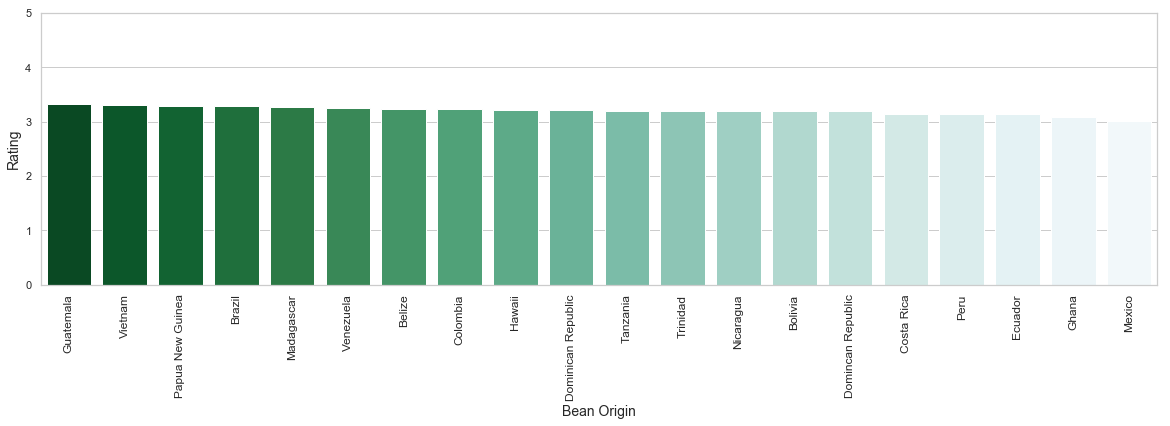

Bar chart of mean rating per origin country, sorted from high to low


<Figure size 720x720 with 0 Axes>

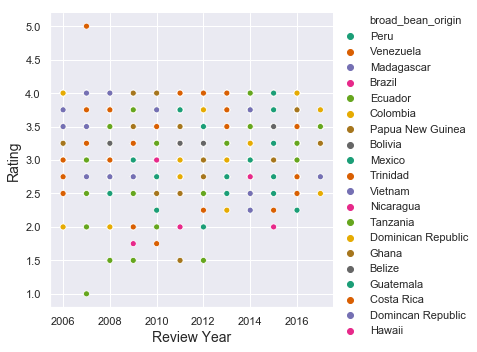

Scatter plot of rating vs. review year, colored by country. 
Too many points plot on each other, rendering this ineffective


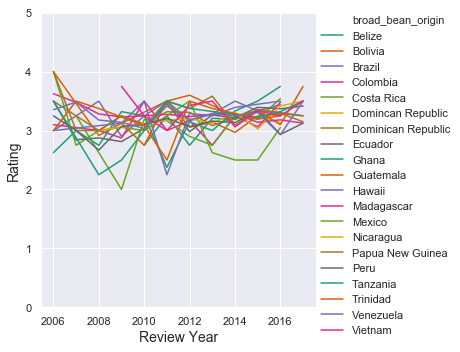

Line chart showing annual trend of mean rating per country. 
Too many countries overplotted, rendering this not very valuable
Though, there does seem to be a small, consistant uptick in average ratings over the timeframe.


In [227]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,5))
sns.violinplot(x='broad_bean_origin', y='rating', data=top_rate_brbeanor)
plt.ylabel('Rating', size=14)
plt.xlabel('Bean Origin', size=14)
plt.xticks(rotation='vertical', size=12)
plt.show()

print('Violin plot of ratings for all bean origins with more than 25 ratings, \nnot ordered in any discernable way')

sns.set(style='whitegrid')
plt.figure(figsize=(20,5))
sns.barplot(x='broad_bean_origin', y='rating', data=topmean_rate_brbeanor, palette='BuGn_r')
plt.ylim(0,5)
plt.ylabel('Rating', size=14)
plt.xlabel('Bean Origin', size=14)
plt.xticks(rotation='vertical', size=12)
plt.show()

print('Bar chart of mean rating per origin country, sorted from high to low')

sns.set(style='darkgrid')
plt.figure(figsize=(10,10))
sns.relplot(x='review_date', y='rating', hue='broad_bean_origin', data=top_rate_brbeanor, palette='Dark2')
plt.xlabel('Review Year', size=14)
plt.ylabel('Rating', size=14)
plt.show()

print('Scatter plot of rating vs. review year, colored by country. \nToo many points plot on each other, rendering this ineffective')


sns.relplot(x='review_date', y='rating', hue='broad_bean_origin', 
            data=year_rate_brbeanor, kind='line', palette='Dark2')
plt.ylim(0,5)
plt.xlabel('Review Year', size=14)
plt.ylabel('Rating', size=14)
plt.show()

print('Line chart showing annual trend of mean rating per country. \nToo many countries overplotted, rendering this not very valuable')
print('Though, there does seem to be a small, consistant uptick in average ratings over the timeframe.')
